# Spiegel Covers

# Hintergrund

Hintergrund zu dem Notebook findet sich in meinem [Blog](http://datenspieler.com/Spiegel-Cover/)

Die Cover-Bilder unterliegen natürlich dem Copyright von [spiegel.de](https://www.spiegel.de)

# Herunterladen der Covers von [spiegel.de](https://www.spiegel.de)

In [1]:
import urllib.request
import os
import numpy as np
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from io import BytesIO
import IPython.display 
#from IPython.core import display
# images2gif used for animated gif 
# Version from https://github.com/isaacgerg/images2gif
import images2gif

In [2]:
BASE_URL = 'https://magazin.spiegel.de/EpubDelivery/image/title/SP/{year}/{week}/300'
# e.g., https://magazin.spiegel.de/EpubDelivery/image/title/SP/1947/1/500 - 
# 500 gives resolution, 300 also works, but smaller

# Das Underscore führt dazu, dass Jekyll (verwende ich für die Webseite das Verzeichnis ignoriert.
folder = '_covers'
os.makedirs(folder, exist_ok=True) 

In [18]:
year_from = 1947
year_to = 2016 #year_to is included

In [19]:
years = range(year_from, year_to+1) #include year_to

Der folgende Code lädt die Covers herunter. Dauert einige Zeit. Nicht jedesmal notwendig auszuführen, wenn die Covers bereits gespeichert sind.

In [5]:
for year in years:
    print('Jahr {year}:'.format(year=year), end='')
    for week in range(1,54): #sometimes 53 
        img_url = BASE_URL.format(year=year, week=week)
        filename = '{folder}/{year}-{week:02d}.jpg'.format(folder=folder,year=year, week=week)
        try:
            urllib.request.urlretrieve(img_url, filename)
            print('.', end='')
        except urllib.error.HTTPError:
            print('o', end='')
    print()

Jahr 1947:...................................................oo
Jahr 1948:....................................................o


# Verschmelzen der Covers

Zuerst eine kleine Funktion um das Bild anzuzeigen. Verwende hier 'jpg' Format, damit das Notebook, in dem das Bild ja angezeigt und somit auch gespeichert wird, nicht zu groß wird.

In [6]:
def display_img(img):
    b = BytesIO()  
    img.save(b, format='jpeg')
    return IPython.display.Image(data=b.getvalue(), format='jpeg')

Nun der eigentliche Code zum zusammenfügen der Bilder.

In [7]:
def merge(years, save=False, view=True):
    """
    Fügt Bilder der Jahre years zusammen. Speichert, falls save=True. Zeigt Ergebnis an, falls view=True .
    """
    # Erzeugen einer Liste der zusammenzufügenden Bilder, basierend auf dem gewünschten Jahren
    allfiles=os.listdir(folder)
    if type(years) in (str, int):
        years = [years]
    years = [str(year) for year in years]
    imlist=[folder + '/' + filename for year in years for filename in allfiles if filename.startswith(year)]
    
    # Vorbereitung für Bilder gleich gleich groß machen und zusammenfügen
    imsize = [Image.open(file).size for file in imlist]
    w,h=map(int,np.median(imsize, axis=0))
    N=len(imlist)
    arr=np.zeros((h,w,3),np.float)
    
    # Bilder gleich groß machen und zusammenfügen
    for im in imlist:
        imarr=np.array(Image.open(im).resize((w,h)),dtype=np.float)
        arr=arr+imarr/N
        
    # Bilder in Format für Export bringen
    arr=np.array(np.round(arr),dtype=np.uint8)

    # Generate, save and preview final image
    out=Image.fromarray(arr,mode="RGB")
    if save:
        out.save('avg-'+'_'.join(years)+'.jpg')
    if view:
        print('_'.join(years))
        return display_img(out)
    return out

Nun kann man die Cover mehrer Jahre einfach übereinanderlegen.

1950_1951_1952_1953_1954_1955_1956_1957_1958_1959


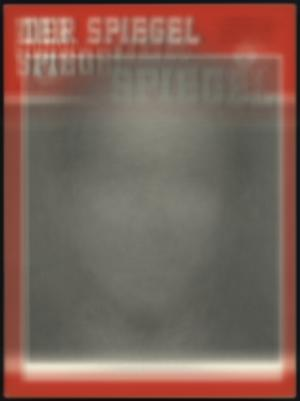

In [8]:
merge(range(1950, 1960))

Zuerst erzeugen wir ein Übersichtsbild, in dem man je 10 Jahre übereinandergelegt sieht

In [9]:
# Größe der einzelnen Bilder
w_small = 150
h_small = 200

# Zwischenraum zwischen den Bildern
w_gap = 20
h_gap = 40

# Großes Galeriebild hat deckt 1940er bis 2010er Jahre ab, also insgesamt 8 Zeitfenster. 
# Daher Anordnung in 2 Zeilen je 4 Spalten. 
spalten = 4
zeilen = 2

# Leeres Bild in entsprechender Größe erzeugen
img_galerie = Image.new(mode='RGB', 
                        size=(w_small * spalten + w_gap * (spalten-1), h_small * zeilen + h_gap * (zeilen)),
                        color = 'white')

In [10]:
# Font für Beschriftung laden
font = ImageFont.truetype("arial.ttf", 16)

for zeile in range(zeilen):
    for spalte in range(spalten):
        jahr_von = 1940 + 10 * spalte + 10 * spalten * zeile
        jahr_bis = jahr_von + 10
#        # Covers gibt es ab 1949 bis 2016
#        jahr_von = max(jahr_von, 1949)
#        jahr_bis = min(jahr_bis, 2016)
        
        print(zeile, spalte,jahr_von, jahr_bis)
        
        # Bilder verschmelzen und Größe anpassen
        img = merge(range(jahr_von, jahr_bis), view=False)
        img = img.resize((w_small, h_small))
        # Bild in das Gesamtbild einfügen
        img_galerie.paste(img, ((w_small + w_gap) * spalte, (h_small + h_gap) * zeile + h_gap))
        # Beschriften
        draw = ImageDraw.Draw(img_galerie)
        txt = '{von}er'.format(von=jahr_von)
        w_size, h_size = draw.textsize(txt, font=font)
        draw.text(((w_small + w_gap) * spalte + int(w_small / 2 - w_size / 2), 
                   (h_small + h_gap) * zeile + int(h_gap / 2 - h_size / 2)),
                  txt,(0,0,0),font=font)

            
img_galerie.save('galerie.jpg', quality=80, optimize=True)

0 0 1940 1950
0 1 1950 1960
0 2 1960 1970
0 3 1970 1980
1 0 1980 1990
1 1 1990 2000
1 2 2000 2010
1 3 2010 2020


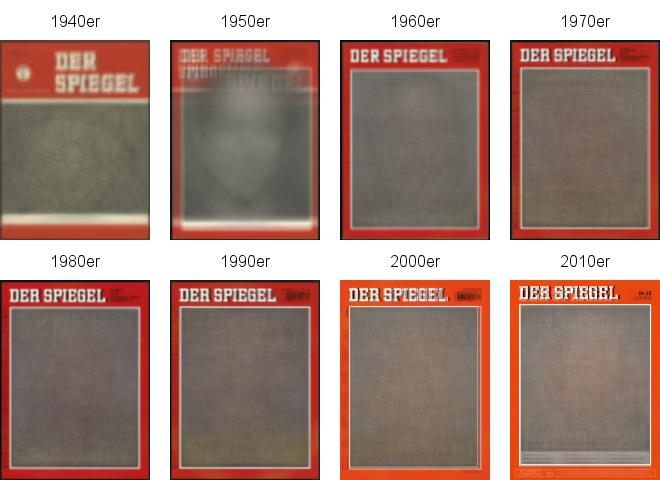

In [11]:
display_img(img_galerie)

# Analyse der Cover über die Zeit

Die ersten Jahre war das Cover sehr konstant.

1947_1948_1949


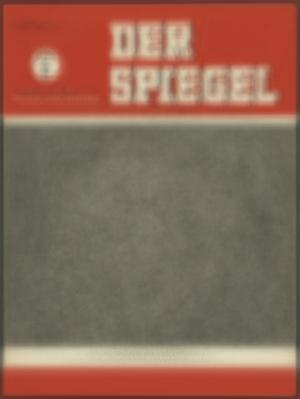

In [28]:
merge([1947, 1948, 1949], save=True)

In den nächsten Jahren ist der Text "DER SPIEGEL" nach links gewandert. Zusätzlich erkennt man ein "Durchschnittsgesicht".

1950_1951_1952_1953_1954


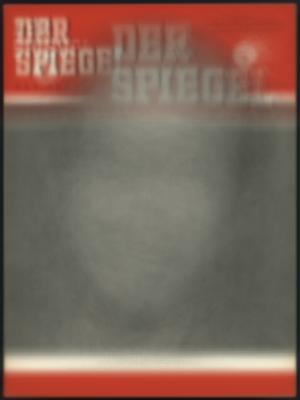

In [29]:
merge([1950, 1951,1952,1953, 1954], save=True)

Dann ist der Titel einzeilig geworden.

1955_1956_1957_1558_1959


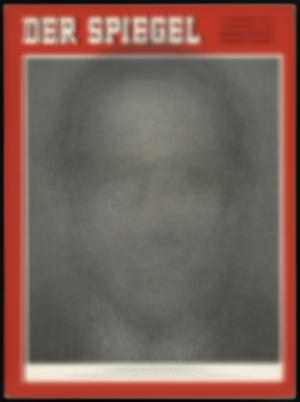

In [9]:
merge([1955, 1956, 1957, 1558, 1959] ,save=True)

In den folgenden Jahren hat sich die Schriftart leicht geändert und der weiße Balken am unteren Rand des Titelbildes ist verschwunden. Zusätzlich wird das "Durchschnittsgesicht" weniger deutlich - es kommen auch Covers, die kein Gesicht zeigen.

1960_1961_1962_1963_1964


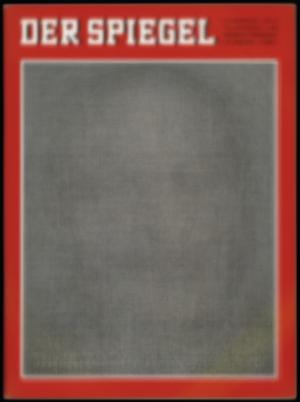

In [10]:
merge(range(1960, 1965) ,save=True)

In den nächsten 5 Jahren verschwindet das "Durchschnittsgesicht" ganz. 

1965_1966_1967_1968_1969


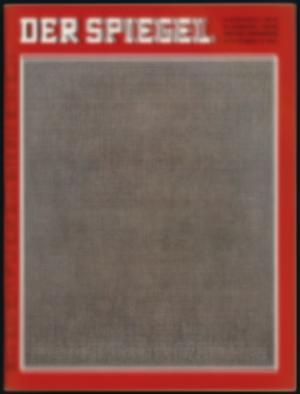

In [11]:
merge(range(1965, 1970) ,save=True)

Die Schriftart ändert sich leicht.

1970_1971_1972_1973_1974_1975_1976_1977_1978_1979


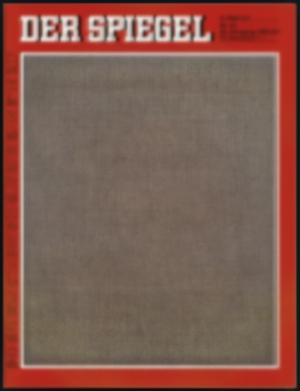

In [12]:
merge(range(1970, 1980) ,save=True)

Keine merkbaren Änderungen in den nächsten 20 Jahren.

1980_1981_1982_1983_1984_1985_1986_1987_1988_1989_1990_1991_1992_1993_1994_1995_1996_1997_1998_1999


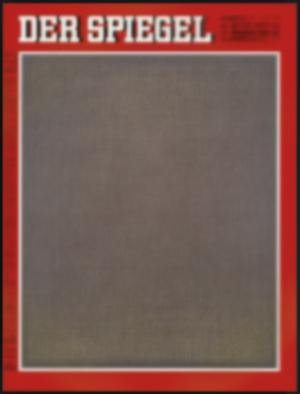

In [13]:
merge(range(1980, 2000) ,save=True)

Nun ändert sich der Farbton.

2000_2001_2002_2003_2004_2005_2006_2007_2008_2009_2010_2011_2012_2013_2014_2015_2016


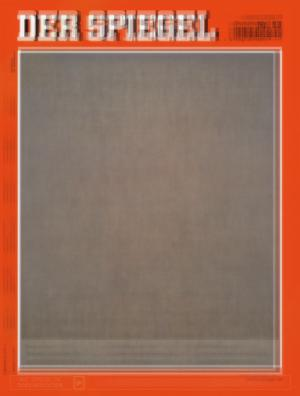

In [14]:
merge(range(2000, 2017), save=True)

# Covers nebeneinander kleben

In [20]:
# Liste aller Covers
allfiles=os.listdir(folder)
imlist=[folder + '/' + filename for filename in allfiles]
# Größe der verkleinerten Covers - hier ein Fünftel
imsize = [Image.open(file).size for file in imlist]
w,h=map(int,np.median(imsize, axis=0))
w_small = int(w / 5)
h_small = int(h / 5)

In [21]:
# Leeres Bild in entsprechender Größe erzeugen
img_strip = Image.new('RGB', (w_small*53,h_small*len(years)))

In [22]:
for nr, year in enumerate(years):
    print(year, '', end='')
    for week in range(1,54):
        filename = '{folder}/{year}-{week:02d}.jpg'.format(folder=folder,year=year, week=week)
        try:
            im = Image.open(filename)
        except:
            im = Image.new('RGB', (w_small,h_small))
        # Bild vergleinern
        im.thumbnail((w_small, h_small))
        # Bild in das Gesamtbild einfügen
        img_strip.paste(im, (w_small * (week-1), h_small * nr))

# Bild speichern, relativ schlechte JPG Qualität, um die Filegröße bei rund 2 MB zu halten
img_strip.save('strip.jpg', quality=20, optimize=True)

1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 

Das Bild ist recht groß, daher besser anzuschauen, wenn man es mittels des Links unten in einem extra Fenster öffnet.

In [23]:
IPython.display.FileLink('strip.jpg')

C:\Users\uniqu\Documents\notebooks_for_blog\2016-spiegel\strip.jpg

# Animiertes GIF aus den Covers

In [24]:
# Liste aller Covers
allfiles=os.listdir(folder)
imlist=[folder + '/' + filename for filename in allfiles]
# Größe der verkleinerten Covers - hier die Hälfte
imsize = [Image.open(file).size for file in imlist]
w,h=map(int,np.median(imsize, axis=0))

# Will man z.B. halb so große Bilder, einfach 1 durch 2 ersetzen
w_small = int(w / 1)
h_small = int(h / 1)

In [27]:
frames = []
font = ImageFont.truetype("arial.ttf", 12)
for year in years:
    print(year, '', end='')
    # Um das Video nicht zu lange zu machen, nehme ich nur das 1. Bild pro Jahr,
    # deshalb range(1,2) = 1. Aber leicht zu ändern, z.B. range(1,54) für jedes Bild
    for week in range(1,2):
        filename = '{folder}/{year}-{week:02d}.jpg'.format(folder=folder,year=year, week=week)
        try:
            im = Image.open(filename)
            im = im.resize((w_small, h_small))
            draw = ImageDraw.Draw(im)
            txt = '{year}-{week:02d}'.format(year=year, week=week)
            w_size, h_size = draw.textsize(txt, font=font)
            draw.text(((w_small - w_size) / 2 , h_small-h_size-5),txt,(0,0,0),font=font)
            frames.append(im)
        except:
            pass
        
        
# Die Dauer der Frames kann einzeln angegeben werden. Alle Frames sollen eine kurze Dauer haben, außer
# der letzte, damit man klar sieht, dass ein Durchlauf zu Ende ist, bevor der nächste beginnt.
dauer = [0.1] * len(frames)
dauer[-1] = 2
images2gif.writeGif('animated.gif', frames, duration=dauer)

1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 

Das Bild lässt sich auch besser anschauen, wenn man es mittels des Links unten in einem extra Fenster öffnet.

In [21]:
IPython.display.FileLink('animated.gif')

C:\Users\uniqu\Documents\git\datenspieler.github.io\notebooks\2016-spiegel\animated.gif